# Pandas Test - Real life Exercise

In [1]:
import pandas as pd

For visualizations:

In [2]:
%pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install plotly_express

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [5]:
ad_recs_annotated = pd.read_csv('data/Final assigment/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
249517,2021-week_50,AD089P88CV,RelayFoods,GB,yes,NaN,Qality,UserPopQ
17847,2021-week_34,AD08DKMPX9,Search Million Culture,GB,no,True,Qality,XGBQ
345317,2022-week_06,AD0877DQ88,RelayFoods,DE,yes,NaN,Qality,UserPopQ
155547,2021-week_43,AD0888K88N,Extreme DA,US,yes,NaN,Yield,RNNY
242215,2021-week_49,AD00QOAEVM,Fancy,US,yes,NaN,Qality,DNNQ


In [6]:
most_pop_ad = ad_recs_annotated.ad_id.value_counts().idxmax()

In [7]:
q = f'ad_id == "{most_pop_ad}"'
q

'ad_id == "AD07PFFMP9"'

In [8]:
ad_recs_annotated.query('ad_id == @most_pop_ad')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

In [9]:
#1
ad_recs_annotated['year'] = ad_recs_annotated.week_id.apply(lambda i: i[:4]).astype('int32')

In [10]:
#2
ad_recs_annotated['quarter'] = \
    ad_recs_annotated.week_id.apply(lambda i: (int(i[-2:]) - 1) // 13 + 1).astype('int32')

In [11]:
#3
ad_recs_annotated['success'] = \
ad_recs_annotated.is_success.apply(lambda i : 1 if i == 'yes' else 0).astype('int32')

In [12]:
#4
print(f'There are {ad_recs_annotated.is_sever.isnull().sum()} missing values in is_sever column.')

There are 304195 missing values in is_sever column.


In [13]:
ad_recs_annotated['is_sever_filled'] = ad_recs_annotated.is_sever.fillna(value = False)

In [14]:
#5
ad_recs_annotated.is_success = ad_recs_annotated.is_success.str.capitalize()

In [15]:
ad_recs_annotated.sample(10)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,success,is_sever_filled
301053,2022-week_03,AD098FGG68,Search Million Culture,DE,Yes,NaN,Qality,UserPopQ,2022,1,1,False
26976,2021-week_34,AD0778NQ8P,Sensor Tower,US,Yes,NaN,Qality,DNNQ,2021,3,1,False
89218,2021-week_39,AD008T89PG,SOLOMO365,GB,Yes,NaN,Qality,DNNQ,2021,3,1,False
97767,2021-week_39,AD08XT9J8J,Extreme DA,US,Yes,NaN,Yield,DNNY,2021,3,1,False
246379,2021-week_50,AD0887E789,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,4,1,False
174547,2021-week_45,AD0778N8HG,VarVee,DE,No,True,Yield,UserPopY,2021,4,0,True
231768,2021-week_49,AD00PKHNCU,RelayFoods,DE,Yes,NaN,Qality,DNNQ,2021,4,1,False
226862,2021-week_48,AD098RT8K8,Extreme DA,US,Yes,NaN,Yield,DNNY,2021,4,1,False
136441,2021-week_42,AD07WTN78M,Puentes Company,IN,Yes,NaN,Yield,UserPopY,2021,4,1,False
289055,2022-week_02,AD09DP889M,MoJoe Brewing Company,GB,Yes,NaN,Yield,DNNY,2022,1,1,False


### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

In [16]:
#1
ad_recs_annotated[ad_recs_annotated.region == 'US'].shape

(103846, 12)

In [17]:
#1
ad_recs_annotated.query('region == "US"').shape

(103846, 12)

In [18]:
#2
ad_recs_annotated[(ad_recs_annotated.region == 'US') & (ad_recs_annotated.success == 1)].shape

(88918, 12)

In [19]:
#2
ad_recs_annotated.query('region == "US" & success == 1').shape

(88918, 12)

In [20]:
#3
ad_recs_annotated[(ad_recs_annotated.region == 'US') \
                  & (ad_recs_annotated.success == 1) \
                  & (ad_recs_annotated.week_id.str.find('52') > 0)].shape

(3342, 12)

In [21]:
#3
ad_recs_annotated.query('region == "US" & success == 1 & week_id.str.find("52") > 0').shape

(3342, 12)

In [22]:
#4
ad_recs_annotated[ad_recs_annotated.rec_provider.isin(['DNNQ', 'RNNY', 'UserPopQ'])].shape

(200093, 12)

In [23]:
#4
ad_recs_annotated.query('rec_provider.isin(["DNNQ", "RNNY", "UserPopQ"])').shape

(200093, 12)

In [24]:
#5
ad_recs_annotated[ad_recs_annotated.rec_provider.str.contains('RuleBased')].shape

(28336, 12)

In [25]:
#5
ad_recs_annotated.query('rec_provider.str.contains("RuleBased")').shape

(28336, 12)

In [26]:
#6
ad_recs_annotated[ad_recs_annotated.year == 2021].shape

(271615, 12)

In [27]:
#6
ad_recs_annotated.query('year == 2021').shape

(271615, 12)

In [28]:
#7
ad_recs_annotated[ad_recs_annotated.week_id.str[-2:].astype('int32').between(30, 40)].shape

(115051, 12)

In [29]:
#7
ad_recs_annotated.query('week_id.str.slice(10,12).astype("int32").between(30, 40)').shape

(115051, 12)

In [30]:
#8
ad_recs_annotated[ad_recs_annotated.ad_id == \
                  ad_recs_annotated.groupby('ad_id').week_id.count().sort_values(ascending = False).index[0]]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,success,is_sever_filled
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,4,1,False
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,4,1,False
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2022,4,1,False
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,4,1,False


In [31]:
#8
ad_id_popular = ad_recs_annotated.groupby("ad_id").week_id.count().sort_values(ascending = False).index[0]
ad_recs_annotated.query('ad_id == @ad_id_popular')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,success,is_sever_filled
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,4,1,False
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,4,1,False
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2022,4,1,False
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,4,1,False


In [32]:
#9
ad_recs_annotated[ad_recs_annotated.rec_provider == \
                  ad_recs_annotated.groupby('rec_provider').week_id.count().sort_values(ascending = True).index[0]]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,success,is_sever_filled
352263,2022-week_06,AD0088UP8R,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352326,2022-week_06,AD09C8KC8Z,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352578,2022-week_06,AD078DT6GJ,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352595,2022-week_06,AD09C8P789,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352703,2022-week_06,AD00UF8VOF,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352714,2022-week_06,AD098CXHRF,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352738,2022-week_06,AD0086GLW0,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352740,2022-week_06,AD08QMJ888,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352745,2022-week_06,AD07H9GM98,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352803,2022-week_06,AD09G9YKC8,MoJoe Brewing Company,JP,No,False,Yield,UserPopSelectionY,2022,1,0,False


In [33]:
#9
provider_least_popular = ad_recs_annotated.groupby('rec_provider').week_id.count().sort_values(ascending = True).index[0]
ad_recs_annotated.query('rec_provider == @provider_least_popular')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,success,is_sever_filled
352263,2022-week_06,AD0088UP8R,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352326,2022-week_06,AD09C8KC8Z,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352578,2022-week_06,AD078DT6GJ,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352595,2022-week_06,AD09C8P789,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352703,2022-week_06,AD00UF8VOF,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352714,2022-week_06,AD098CXHRF,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352738,2022-week_06,AD0086GLW0,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352740,2022-week_06,AD08QMJ888,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352745,2022-week_06,AD07H9GM98,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,1,1,False
352803,2022-week_06,AD09G9YKC8,MoJoe Brewing Company,JP,No,False,Yield,UserPopSelectionY,2022,1,0,False


In [34]:
#10
ad_recs_annotated[ad_recs_annotated.is_sever.isnull()].shape

(304195, 12)

In [35]:
#10
ad_recs_annotated.query('is_sever.isnull()').shape

(304195, 12)

In [36]:
#11
ad_recs_annotated[ad_recs_annotated.requester.str.split().apply(lambda i: len(i) == 3)]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,success,is_sever_filled
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,False
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
373663,2022-week_52,AD09G98VJZ,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,4,1,False
373689,2022-week_52,AD078WDG8W,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,4,1,False
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,1,False
373722,2022-week_52,AD09C8X6VY,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2022,4,1,False


In [37]:
#11
all_companies = list(ad_recs_annotated.requester.unique())
three_word_companies = [i for i in all_companies if len(i.split()) == 3]
ad_recs_annotated.query('requester == @three_word_companies')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,success,is_sever_filled
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,False
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
373663,2022-week_52,AD09G98VJZ,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,4,1,False
373689,2022-week_52,AD078WDG8W,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,4,1,False
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,1,False
373722,2022-week_52,AD09C8X6VY,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2022,4,1,False


In [38]:
#12
ad_recs_annotated[ad_recs_annotated.requester.str.split().apply(lambda i: len(i) == 3) \
                  & ad_recs_annotated.ad_id.str.contains('6')]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,success,is_sever_filled
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
11,2021-week_33,AD88967068,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False
41,2021-week_33,AD07L6JC8W,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
373364,2022-week_52,AD06XJR86M,MoJoe Brewing Company,US,Yes,NaN,Yield,RuleBasedY,2022,4,1,False
373394,2022-week_52,AD08Y6R9WV,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,1,False
373511,2022-week_52,AD09C68T8Y,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,1,False
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,1,False


In [39]:
#12
ad_recs_annotated.query('requester == @three_word_companies & ad_id.str.contains("6")')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,success,is_sever_filled
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
11,2021-week_33,AD88967068,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False
41,2021-week_33,AD07L6JC8W,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
373364,2022-week_52,AD06XJR86M,MoJoe Brewing Company,US,Yes,NaN,Yield,RuleBasedY,2022,4,1,False
373394,2022-week_52,AD08Y6R9WV,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,1,False
373511,2022-week_52,AD09C68T8Y,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,1,False
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,1,False


In [40]:
#13
def multy_30_string(word):
    res = 1
    for i in word:
        if i.isdigit() and i != '0':
            res = res * int(i)
    return res >= 30

In [41]:
#13
ad_recs_annotated[ad_recs_annotated.requester.str.split().apply(lambda i: len(i) == 3) \
                  & ad_recs_annotated.ad_id.apply(lambda i: multy_30_string(i))]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,success,is_sever_filled
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,False
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
373663,2022-week_52,AD09G98VJZ,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,4,1,False
373689,2022-week_52,AD078WDG8W,MoJoe Brewing Company,US,Yes,NaN,Yield,RNNY,2022,4,1,False
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,4,1,False
373722,2022-week_52,AD09C8X6VY,Search Million Culture,US,Yes,NaN,Qality,DNNQ,2022,4,1,False


### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


In [42]:
#1 How many weeks available in the data? Are there any missing weeks?
ad_recs_annotated.week_id.value_counts().count()

26

In [43]:
#1
ad_recs_annotated.week_id.value_counts().sort_index()

2021-week_33    14356
2021-week_34    14371
2021-week_35    14373
2021-week_36    14390
2021-week_37    14392
2021-week_38    14347
2021-week_39    14416
2021-week_40    14406
2021-week_41    14380
2021-week_42    14376
2021-week_43    14367
2021-week_44    14299
2021-week_45    14440
2021-week_46    14350
2021-week_47    14402
2021-week_48    14404
2021-week_49    14337
2021-week_50    14404
2021-week_51    12805
2022-week_01    14385
2022-week_02    14423
2022-week_03    14317
2022-week_04    14367
2022-week_05    14362
2022-week_06    14389
2022-week_52    15930
Name: week_id, dtype: int64

Missing 2021-week-52 and weeks from 2022-week-07 to 2022-week-51.

In [44]:
#2 How many regions available in the data? Are there any missing weeks per region?
ad_recs_annotated.region.value_counts().count()

5

In [45]:
ad_recs_annotated.groupby(['week_id', 'region'])['ad_id'].count().sort_index().unstack()

region,DE,GB,IN,JP,US
week_id,,,,,
2021-week_33,2395.0,3180.0,3196.0,1611.0,3974.0
2021-week_34,2360.0,3187.0,3219.0,1599.0,4006.0
2021-week_35,2393.0,3209.0,3209.0,1580.0,3982.0
2021-week_36,2401.0,3209.0,3213.0,1589.0,3978.0
2021-week_37,2404.0,3181.0,3183.0,1644.0,3980.0
2021-week_38,2400.0,3188.0,3175.0,1594.0,3990.0
2021-week_39,2407.0,3206.0,3212.0,1593.0,3998.0
2021-week_40,2399.0,3211.0,3191.0,1618.0,3987.0
2021-week_41,2399.0,3202.0,3214.0,1573.0,3992.0


Missing region JP in 2021-week-51..ipynb_checkpoints/

In [46]:
#3 How many ads are being sent to annotation in each region per week?
ad_recs_annotated.groupby(['week_id', 'region'])['ad_id'].count().unstack().mean()

region
DE    2391.423077
GB    3191.692308
IN    3198.230769
JP    1665.080000
US    3994.076923
dtype: float64

In [47]:
#4 How many None values are there in is_sever column?
ad_recs_annotated[ad_recs_annotated.is_sever.isnull()].shape

(304195, 12)

In [48]:
#5 Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? 
#  (e.g. ad X where sent 50 times in week Y)
ad_recs_annotated.groupby(['week_id', 'ad_id']) \
     .ad_id.count().sort_values(ascending = False).head(1)

week_id       ad_id     
2021-week_40  AD098SWYF6    81
Name: ad_id, dtype: int64

6.Are there ads that are being sent in more than one week?
  A. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
  B. What are the weeks that the ad from above was sent in?
  C. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.

In [49]:
#6A
ad_recs_annotated[['week_id', 'ad_id']].drop_duplicates() \
     .groupby('ad_id').count().sort_values(by = 'week_id' ,ascending = False).head(1)

,week_id
ad_id,
AD07PFFMP9,26


In [50]:
#6B 
ad_most_weeks = ad_recs_annotated[['week_id', 'ad_id']].drop_duplicates() \
     .groupby('ad_id').count().sort_values(by = 'week_id' ,ascending = False).head(1).index[0]

ad_recs_annotated.loc[ad_recs_annotated.ad_id == ad_most_weeks , 'week_id'].drop_duplicates()


7031      2021-week_33
20010     2021-week_34
35214     2021-week_35
50779     2021-week_36
63522     2021-week_37
77609     2021-week_38
92183     2021-week_39
106419    2021-week_40
120730    2021-week_41
135450    2021-week_42
149649    2021-week_43
164504    2021-week_44
178548    2021-week_45
193098    2021-week_46
207294    2021-week_47
221543    2021-week_48
235851    2021-week_49
250212    2021-week_50
265590    2021-week_51
277433    2022-week_01
291604    2022-week_02
306067    2022-week_03
321211    2022-week_04
335221    2022-week_05
351601    2022-week_06
363522    2022-week_52
Name: week_id, dtype: object

In [51]:
#6c

ad_recs_annotated.loc[ad_recs_annotated.is_success == 'Yes', ['ad_id', 'week_id', 'is_success']].drop_duplicates() \
    .merge(ad_recs_annotated.loc[ad_recs_annotated.is_success == 'No', ['ad_id', 'week_id', 'is_success']].drop_duplicates(), \
           how = 'inner', on = 'ad_id')

#ad_recs_annotated.loc[ad_recs_annotated.ad_id == ad_most_weeks , 'week_id'].drop_duplicates()


,ad_id,week_id_x,is_success_x,week_id_y,is_success_y
0,AD07H9DVL,2021-week_33,Yes,2021-week_40,No
1,AD07H9DVL,2021-week_33,Yes,2021-week_41,No
2,AD07H9DVL,2021-week_35,Yes,2021-week_40,No
3,AD07H9DVL,2021-week_35,Yes,2021-week_41,No
4,AD07H9DVL,2021-week_40,Yes,2021-week_40,No
...,...,...,...,...,...
17510,AD08MJ8DFQ,2022-week_52,Yes,2021-week_38,No
17511,AD07ZDTXJ9,2022-week_52,Yes,2022-week_03,No
17512,AD00HW89UG,2022-week_52,Yes,2021-week_50,No
17513,AD07T89P88,2022-week_52,Yes,2021-week_44,No


In [52]:
#7 When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? 
#  What do you learn from it about the reason for Nones in the first place?
ad_recs_annotated.query('is_sever.isnull()').groupby('is_success').ad_id.count()

is_success
No          6
Yes    304189
Name: ad_id, dtype: int64

When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place?

We learn that in case of sucess, no one report on severity, and the decision to tune None values to False if correct.

In [53]:
#8 Per each region, What is the Quality/Yield traffic proportion WoW?
ad_reg_recommendation = ad_recs_annotated.groupby(['region', 'recommendation_type']).ad_id.count().unstack()

ad_reg_recommendation.assign(Quality_Yield_Prop = ad_reg_recommendation.Qality / ad_reg_recommendation.Yield)

recommendation_type,Qality,Yield,Quality_Yield_Prop
region,,,
DE,50295,11882,4.232873
GB,69403,13581,5.110301
IN,40852,42302,0.965723
JP,35469,6158,5.759825
US,40553,63293,0.640719


In [54]:
#9 How many different reqeusters are there?
ad_recs_annotated.requester.drop_duplicates().count()

36

In [55]:
#10 Which are the top 5 requesters per region?
ad_recs_annotated.groupby(['region', 'requester']).ad_id.count().rename('total_ads').reset_index() \
   .sort_values(by = ['region','total_ads'] ,ascending = False).groupby(['region']).head(5)

,region,requester,total_ads
85,US,Extreme DA,57215
86,US,Fancy,18668
106,US,Tab Solutions,9790
104,US,Search Million Culture,5610
105,US,Sensor Tower,3503
70,JP,RelayFoods,24574
71,JP,Search Million Culture,7906
66,JP,MoJoe Brewing Company,3549
65,JP,LocalVox Media,1724
72,JP,Tab Solutions,1366


In [56]:
#11 Which are the different rec_proivders?
ad_recs_annotated.rec_provider.drop_duplicates().sort_values().to_list()

['BooksQ',
 'BooksY',
 'DNNQ',
 'DNNY',
 'ManualQ',
 'ManualY',
 'RNNQ',
 'RNNY',
 'RuleBased',
 'RuleBasedY',
 'UserPopQ',
 'UserPopSelectionQ',
 'UserPopSelectionY',
 'UserPopY',
 'XGBQ',
 'XGBY']

In [57]:
#12 Are there different rec providers per region?
ad_recs_annotated.groupby(['rec_provider', 'region']).ad_id.count().unstack()

region,DE,GB,IN,JP,US
rec_provider,,,,,
BooksQ,1353.0,NaN,NaN,NaN,367.0
BooksY,1257.0,NaN,NaN,NaN,2893.0
DNNQ,32433.0,39675.0,NaN,24574.0,20742.0
DNNY,5417.0,7273.0,NaN,3859.0,28567.0
ManualQ,968.0,2154.0,5293.0,697.0,4732.0
ManualY,605.0,553.0,225.0,125.0,474.0
RNNQ,NaN,11369.0,NaN,NaN,9614.0
RNNY,NaN,1548.0,NaN,NaN,11184.0
RuleBased,NaN,40.0,7.0,NaN,135.0


Some providers locate in one region, some in more than one region, and some in all regions.

In [58]:
#13 Are there different rec providers per rec type?
ad_recs_annotated.groupby(['rec_provider', 'recommendation_type']).ad_id.count()

rec_provider       recommendation_type
BooksQ             Qality                   1720
BooksY             Yield                    4150
DNNQ               Qality                 117424
DNNY               Yield                   45116
ManualQ            Qality                  10220
                   Yield                    3624
ManualY            Qality                   1439
                   Yield                     543
RNNQ               Qality                  20983
RNNY               Yield                   12732
RuleBased          Qality                    182
RuleBasedY         Yield                   28154
UserPopQ           Qality                  69937
UserPopSelectionQ  Qality                   2417
UserPopSelectionY  Yield                      21
UserPopY           Yield                   38600
XGBQ               Qality                  12250
XGBY               Yield                    4276
Name: ad_id, dtype: int64

Shoulnd not by different rec providers per rec type, each  rec provider belongs to single type.
Only rec providers ManualQ and ManualY belong to both tpye, probably by mistake.

#14 What are the notation rules distinguishing between quality vs yielding providers?
They are all ended with 'Y' (except the manual provider)

In [59]:
#15 Which is the most successful region of operation?
ad_recs_annotated.groupby('region')['success'].mean().sort_values(ascending = False)

region
US    0.856249
GB    0.837619
DE    0.814192
JP    0.763927
IN    0.761900
Name: success, dtype: float64

In [60]:
#16 Which is the most successful rec provider per each region?
ad_recs_annotated.groupby(['region', 'rec_provider'])['success'].mean().rename('success_rate') \
    .reset_index('rec_provider').sort_values(by = 'success_rate' ,ascending = False).groupby('region').head(1)

,rec_provider,success_rate
region,,
US,BooksY,0.985482
GB,RuleBased,0.975000
DE,BooksY,0.966587
IN,ManualQ,0.952390
JP,ManualQ,0.934003


In [61]:
import math

In [62]:
def CI_group(grp):
    ci95_hi = []
    ci95_lo = []

    for i in grp.index:
        mean_, count_, std_ = grp.loc[i,['mean', 'count', 'std']]
        ci95_hi.append(mean_ + 1.96 * std_ / math.sqrt(count_))
        ci95_lo.append(mean_ - 1.96 * std_ / math.sqrt(count_))

    grp['CI_high'] = ci95_hi
    grp['CI_low'] = ci95_lo

    return(grp)

In [63]:
#17 Present a table with a success rate, sever defects rate and CI (for each metric) per region
ad_region_success = ad_recs_annotated.groupby('region')['success'].agg(['mean', 'count', 'std'])
ad_region_success = CI_group(ad_region_success).reset_index().drop(columns = ['std', 'count']) \
    .rename(columns={'mean':'success_rate', 'CI_high': 'success_CI_high', 'CI_low': 'success_CI_low'})

ad_region_sever = ad_recs_annotated.groupby('region')['is_sever_filled'].agg(['mean', 'count', 'std'])
ad_region_sever = CI_group(ad_region_sever).reset_index().drop(columns = ['std', 'count']) \
    .rename(columns={'mean':'sever_rate', 'CI_high': 'sever_CI_high', 'CI_low': 'sever_CI_low'})

ad_region_success.merge(ad_region_sever)

,region,success_rate,success_CI_high,success_CI_low,sever_rate,sever_CI_high,sever_CI_low
0,DE,0.814192,0.817249,0.811134,0.113595,0.116089,0.111101
1,GB,0.837619,0.840129,0.835110,0.119650,0.121858,0.117441
2,IN,0.761900,0.764795,0.759005,0.141136,0.143502,0.138769
3,JP,0.763927,0.768007,0.759848,0.155116,0.158593,0.151638
4,US,0.856249,0.858383,0.854115,0.091520,0.093274,0.089766


In [64]:
#18 Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
ad_provider_success = ad_recs_annotated.groupby('rec_provider')['success'].agg(['mean', 'count', 'std'])
ad_provider_success = CI_group(ad_provider_success).reset_index().drop(columns = ['std', 'count']) \
    .rename(columns={'mean':'success_rate', 'CI_high': 'success_CI_high', 'CI_low': 'success_CI_low'})

ad_provider_sever = ad_recs_annotated.groupby('rec_provider')['is_sever_filled'].agg(['mean', 'count', 'std'])
ad_provider_sever = CI_group(ad_provider_sever).reset_index().drop(columns = ['std', 'count']) \
    .rename(columns={'mean':'sever_rate', 'CI_high': 'sever_CI_high', 'CI_low': 'sever_CI_low'})

ad_provider_success.merge(ad_provider_sever).head()

,rec_provider,success_rate,success_CI_high,success_CI_low,sever_rate,sever_CI_high,sever_CI_low
0,BooksQ,0.836628,0.854105,0.819151,0.016279,0.022261,0.010297
1,BooksY,0.979759,0.984044,0.975474,0.005301,0.007511,0.003092
2,DNNQ,0.858376,0.860371,0.856382,0.119056,0.120908,0.117203
3,DNNY,0.886714,0.889639,0.883790,0.085690,0.088273,0.083107
4,ManualQ,0.953193,0.956711,0.949674,0.024704,0.027290,0.022118


In [65]:
#19 Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
ad_region_provider_success = ad_recs_annotated.groupby(['region', 'rec_provider'])['success'].agg(['mean', 'count', 'std'])
ad_region_provider_success = CI_group(ad_region_provider_success).reset_index().drop(columns = ['std', 'count']) \
    .rename(columns={'mean':'success_rate', 'CI_high': 'success_CI_high', 'CI_low': 'success_CI_low'})

ad_region_provider_sever = ad_recs_annotated.groupby(['region', 'rec_provider'])['is_sever_filled'].agg(['mean', 'count', 'std'])
ad_region_provider_sever = CI_group(ad_region_provider_sever).reset_index().drop(columns = ['std', 'count']) \
    .rename(columns={'mean':'sever_rate', 'CI_high': 'sever_CI_high', 'CI_low': 'sever_CI_low'})

ad_region_provider_success.merge(ad_region_provider_sever).head()

,region,rec_provider,success_rate,success_CI_high,success_CI_low,sever_rate,sever_CI_high,sever_CI_low
0,DE,BooksQ,0.799704,0.821038,0.778371,0.019217,0.026535,0.011899
1,DE,BooksY,0.966587,0.976526,0.956648,0.007955,0.012869,0.003042
2,DE,DNNQ,0.839114,0.843113,0.835116,0.122869,0.126442,0.119296
3,DE,DNNY,0.917297,0.924633,0.909962,0.049843,0.055639,0.044047
4,DE,ManualQ,0.857438,0.879475,0.835401,0.048554,0.062101,0.035007


In [66]:
#20 Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
ad_rec_type_success = ad_recs_annotated.groupby('recommendation_type')['success'].agg(['mean', 'count', 'std'])
ad_rec_type_success = CI_group(ad_rec_type_success).reset_index().drop(columns = ['std', 'count']) \
    .rename(columns={'mean':'success_rate', 'CI_high': 'success_CI_high', 'CI_low': 'success_CI_low'})

ad_rec_type_sever = ad_recs_annotated.groupby('recommendation_type')['is_sever_filled'].agg(['mean', 'count', 'std'])
ad_rec_type_sever = CI_group(ad_rec_type_sever).reset_index().drop(columns = ['std', 'count']) \
    .rename(columns={'mean':'sever_rate', 'CI_high': 'sever_CI_high', 'CI_low': 'sever_CI_low'})

ad_rec_type_success.merge(ad_rec_type_sever)

,recommendation_type,success_rate,success_CI_high,success_CI_low,sever_rate,sever_CI_high,sever_CI_low
0,Qality,0.830910,0.832420,0.829399,0.109210,0.110467,0.107953
1,Yield,0.784427,0.786603,0.782252,0.137397,0.139218,0.135575


In [67]:
#21 Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
ad_rec_type_region_success = ad_recs_annotated.groupby(['recommendation_type', 'region'])['success'].agg(['mean', 'count', 'std'])
ad_rec_type_region_success = CI_group(ad_rec_type_region_success).reset_index().drop(columns = ['std', 'count']) \
    .rename(columns={'mean':'success_rate', 'CI_high': 'success_CI_high', 'CI_low': 'success_CI_low'})

ad_rec_type_region_sever = ad_recs_annotated.groupby(['recommendation_type', 'region'])['is_sever_filled'].agg(['mean', 'count', 'std'])
ad_rec_type_region_sever = CI_group(ad_rec_type_region_sever).reset_index().drop(columns = ['std', 'count']) \
    .rename(columns={'mean':'sever_rate', 'CI_high': 'sever_CI_high', 'CI_low': 'sever_CI_low'})

ad_rec_type_region_success.merge(ad_rec_type_region_sever)

,recommendation_type,region,success_rate,success_CI_high,success_CI_low,sever_rate,sever_CI_high,sever_CI_low
0,Qality,DE,0.806681,0.810132,0.803229,0.121503,0.124358,0.118648
1,Qality,GB,0.850367,0.853021,0.847713,0.108295,0.110607,0.105983
2,Qality,IN,0.806129,0.809963,0.802296,0.088980,0.091741,0.086219
3,Qality,JP,0.777806,0.782132,0.773479,0.156587,0.160370,0.152805
4,Qality,US,0.899070,0.902002,0.896138,0.074470,0.077026,0.071915
5,Yield,DE,0.845986,0.852476,0.839495,0.080121,0.085003,0.075240
6,Yield,GB,0.772476,0.779527,0.765425,0.177675,0.184104,0.171246
7,Yield,IN,0.719186,0.723468,0.714903,0.191504,0.195254,0.187754
8,Yield,JP,0.683988,0.695601,0.672375,0.146639,0.155475,0.137802
9,Yield,US,0.828812,0.831747,0.825877,0.102444,0.104807,0.100082


In [70]:
#22 Present WoW table/graph with success rate and CI (see image below) per region
ad_week_region_success = ad_recs_annotated.groupby(['week_id', 'region'])['success'].agg(['mean', 'count', 'std'])
ad_week_region_success = CI_group(ad_week_region_success).reset_index() \
    .rename(columns={'mean':'success_rate', 'CI_high': 'success_CI_high', 'CI_low': 'success_CI_low'})

ad_week_region_success.head()

,week_id,region,success_rate,count,std,success_CI_high,success_CI_low
0,2021-week_33,DE,0.805846,2395,0.395631,0.821691,0.790000
1,2021-week_33,GB,0.849686,3180,0.357436,0.862109,0.837262
2,2021-week_33,IN,0.732478,3196,0.442736,0.747828,0.717128
3,2021-week_33,JP,0.690875,1611,0.462276,0.713449,0.668301
4,2021-week_33,US,0.887771,3974,0.315688,0.897586,0.877955


In [71]:
#23 Present WoW table/graph with success rate and CI (see image below) per region and rec type
ad_week_region_rec_type_success = ad_recs_annotated.groupby(['week_id', 'region', 'recommendation_type'])['success'] \
    .agg(['mean', 'count', 'std'])
ad_week_region_rec_type_success = CI_group(ad_week_region_rec_type_success).reset_index().drop(columns = ['std', 'count']) \
    .rename(columns={'mean':'success_rate', 'CI_high': 'success_CI_high', 'CI_low': 'success_CI_low'})
ad_week_region_rec_type_success.head()

,week_id,region,recommendation_type,success_rate,success_CI_high,success_CI_low
0,2021-week_33,DE,Qality,0.805556,0.823319,0.787792
1,2021-week_33,DE,Yield,0.806982,0.842070,0.771893
2,2021-week_33,GB,Qality,0.854478,0.867831,0.841124
3,2021-week_33,GB,Yield,0.824000,0.857414,0.790586
4,2021-week_33,IN,Qality,0.750683,0.772852,0.728514


In [72]:
#24 Present WoW table/graph with success rate and CI (see image below) per region and rec provider
ad_week_region_provider_success = ad_recs_annotated.groupby(['week_id', 'region', 'rec_provider'])['success'] \
    .agg(['mean', 'count', 'std'])
ad_week_region_provider_success = CI_group(ad_week_region_provider_success).reset_index().drop(columns = ['std', 'count']) \
    .rename(columns={'mean':'success_rate', 'CI_high': 'success_CI_high', 'CI_low': 'success_CI_low'})
ad_week_region_provider_success.head()

,week_id,region,rec_provider,success_rate,success_CI_high,success_CI_low
0,2021-week_33,DE,BooksQ,0.838235,0.926410,0.750061
1,2021-week_33,DE,BooksY,0.975000,1.024000,0.926000
2,2021-week_33,DE,DNNQ,0.827804,0.848610,0.806998
3,2021-week_33,DE,DNNY,0.906593,0.948988,0.864199
4,2021-week_33,DE,ManualQ,0.865385,0.959059,0.771710


In [73]:
#25 Which are the requester to which we succeed the most?
#We took only requester with 100 reqests or more!
ad_requester_success = ad_recs_annotated.groupby('requester')['success'].agg(['mean', 'count']) \
    .sort_values('mean', ascending = False).reset_index().rename(columns={'mean':'success_rate'}) 
ad_requester_success = ad_requester_success[ad_requester_success['count'] >= 100]
ad_requester_success.head(1)

,requester,success_rate,count
6,PageBites,0.911111,135


In [74]:
#26 Which are the requester to which we produce the most critical defects?
#We took only requester with 100 reqests or more!
ad_requester_sever = ad_recs_annotated.groupby('requester')['is_sever_filled'].agg(['mean', 'count']) \
    .sort_values('mean', ascending = False).reset_index().rename(columns={'mean':'sever_rate'}) 
ad_requester_sever = ad_requester_sever[ad_requester_sever['count'] >= 100]
ad_requester_sever.head(1)

,requester,sever_rate,count
1,Modanisa,0.378869,3748


In [75]:
#27 What is the overall success rate trend over time?
ad_week_success = ad_recs_annotated.groupby('week_id')['success'].mean().sort_index().reset_index() \
    .rename(columns={'success':'success_rate'}) 

ad_week_success['success_trend'] = ad_week_success.success_rate.shift() / ad_week_success.success_rate
ad_week_success.head()

,week_id,success_rate,success_trend
0,2021-week_33,0.809000,NaN
1,2021-week_34,0.808294,1.000873
2,2021-week_35,0.816044,0.990504
3,2021-week_36,0.814107,1.002379
4,2021-week_37,0.813230,1.001079


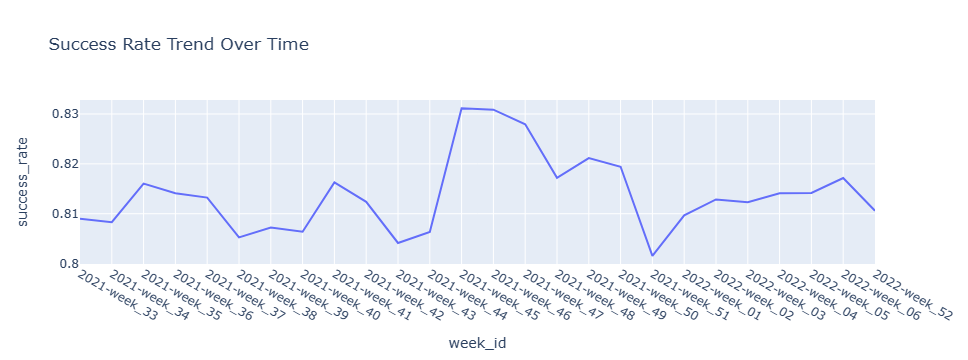

In [76]:
px.line(ad_week_success, x = 'week_id', y ='success_rate', title = 'Success Rate Trend Over Time')

In [77]:
#28 What is the overall sever defect rate trend over time?
ad_week_sever = ad_recs_annotated.groupby('week_id')['is_sever_filled'].mean().sort_index().reset_index() \
    .rename(columns={'is_sever_filled':'sever_rate'}) 

ad_week_sever['sever_trend'] = ad_week_sever.sever_rate.shift() / ad_week_sever.sever_rate
ad_week_sever.head()

,week_id,sever_rate,sever_trend
0,2021-week_33,0.124617,NaN
1,2021-week_34,0.123791,1.006672
2,2021-week_35,0.114451,1.081609
3,2021-week_36,0.116261,0.984427
4,2021-week_37,0.120345,0.966070


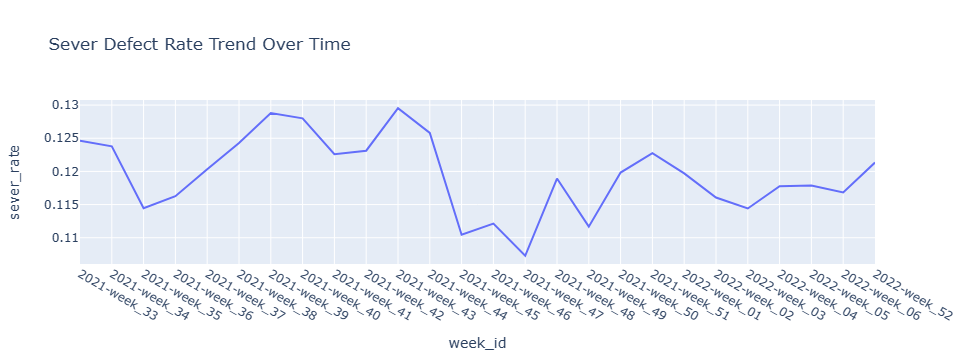

In [78]:
px.line(ad_week_sever, x = 'week_id', y ='sever_rate', title = 'Sever Defect Rate Trend Over Time')

In [79]:
#29 Preset a WoW graph showing the number of requests per customer in each region (hint: use stacked bars), from it:
ad_reqester_region = ad_recs_annotated.groupby(['requester','region'])['ad_id'].count().sort_index().reset_index() \
    .rename(columns={'ad_id':'request_count'}) 

ad_reqester_region.head()

,requester,region,request_count
0,Allthetopbananas.com,DE,51
1,Allthetopbananas.com,GB,50
2,Allthetopbananas.com,IN,107
3,Allthetopbananas.com,US,8
4,Altammune,US,5


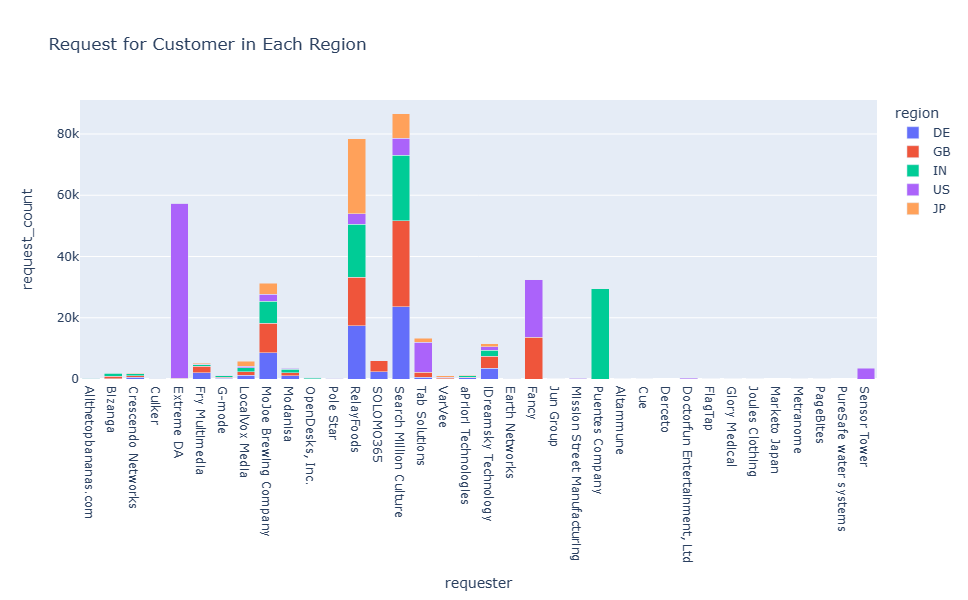

In [80]:
px.bar(ad_reqester_region, x = 'requester', y ='request_count', hover_data = ['region'], barmode = 'stack', \
       color = 'region', height = 600, title = 'Request for Customer in Each Region')

In [81]:
ad_recs_annotated.head()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,quarter,success,is_sever_filled
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,False
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,False
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,False


In [82]:
#30 Identify major traffic shape changes (addition/removal) of major clients
ad_requester = ad_recs_annotated.groupby('requester')['ad_id'].count().reset_index().rename(columns={'ad_id':'request_count'})
ad_top_requesters = ad_requester.loc[ad_requester['request_count'] >= 10000, 'requester'].to_list()
 
ad_requester_traffic_shape = ad_recs_annotated[ad_recs_annotated.requester.isin(ad_top_requesters)] \
    .groupby(['week_id', 'requester'])['ad_id'].count().reset_index().rename(columns={'ad_id':'request_count'})
ad_requester_traffic_shape.head()

,week_id,requester,request_count
0,2021-week_33,Extreme DA,505
1,2021-week_33,Fancy,931
2,2021-week_33,MoJoe Brewing Company,1353
3,2021-week_33,Puentes Company,1357
4,2021-week_33,RelayFoods,1569


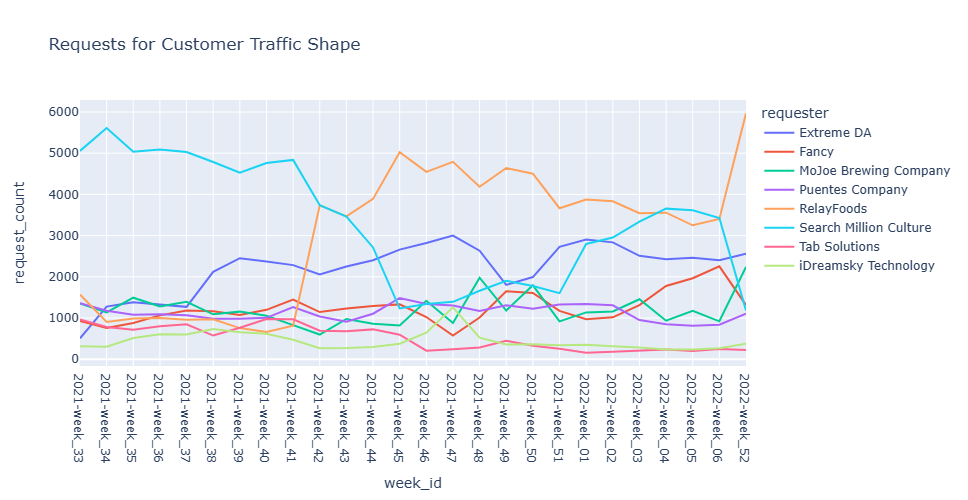

In [83]:
px.line(ad_requester_traffic_shape, x = 'week_id', y ='request_count', color = 'requester', \
        height = 500, title = 'Requests for Customer Traffic Shape')

In [85]:
#31 Present a WoW graph showing the requests proportion per customer in each region (hint: use stacked bars), from it:
ad_reqester_region = ad_reqester_region.merge(ad_requester, on = 'requester', suffixes = ('', '_total'))
ad_reqester_region['request_proportion'] = ad_reqester_region['request_count'] / ad_reqester_region['request_count_total']
ad_reqester_region.head()

,requester,region,request_count,request_count_total,request_proportion
0,Allthetopbananas.com,DE,51,216,0.236111
1,Allthetopbananas.com,GB,50,216,0.231481
2,Allthetopbananas.com,IN,107,216,0.495370
3,Allthetopbananas.com,US,8,216,0.037037
4,Altammune,US,5,5,1.000000


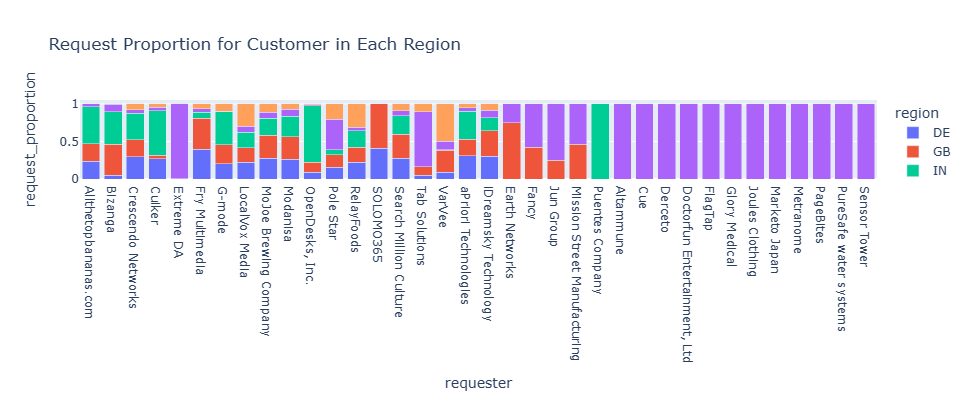

In [86]:
px.bar(ad_reqester_region, x = 'requester', y ='request_proportion', hover_data = ['region'], barmode = 'stack', \
       color = 'region', height = 400, title = 'Request Proportion for Customer in Each Region')

In [87]:
#32 Identify major traffic shape changes (addition/removal) of major clients
ad_requester_traffic_shape['request_trend'] = ad_requester_traffic_shape.groupby('requester')['request_count'].pct_change()
#ad_requester_traffic_shape_change['change'] = ad_requester_traffic_shape_change.request_count.pct_change()

ad_requester_traffic_shape[abs(ad_requester_traffic_shape['request_trend']) > 0.3] \
    .sort_values(by = ['requester', 'week_id'])

,week_id,requester,request_count,request_trend
8,2021-week_34,Extreme DA,1278,1.530693
40,2021-week_38,Extreme DA,2120,0.667978
128,2021-week_49,Extreme DA,1804,-0.315110
144,2021-week_51,Extreme DA,2726,0.367101
113,2021-week_47,Fancy,573,-0.440430
121,2021-week_48,Fancy,1012,0.766143
129,2021-week_49,Fancy,1648,0.628458
177,2022-week_04,Fancy,1779,0.354912
201,2022-week_52,Fancy,1313,-0.417738
18,2021-week_35,MoJoe Brewing Company,1493,0.316578


Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

### Compactization

* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [88]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

['.ipynb_checkpoints',
 '2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv']

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

In [89]:
ad_week_region_success = ad_week_region_success.reset_index()
ad_week_region_success

,index,week_id,region,success_rate,count,std,success_CI_high,success_CI_low
0,0,2021-week_33,DE,0.805846,2395,0.395631,0.821691,0.790000
1,1,2021-week_33,GB,0.849686,3180,0.357436,0.862109,0.837262
2,2,2021-week_33,IN,0.732478,3196,0.442736,0.747828,0.717128
3,3,2021-week_33,JP,0.690875,1611,0.462276,0.713449,0.668301
4,4,2021-week_33,US,0.887771,3974,0.315688,0.897586,0.877955
...,...,...,...,...,...,...,...,...
124,124,2022-week_52,DE,0.813182,2382,0.389847,0.828838,0.797526
125,125,2022-week_52,GB,0.830769,3185,0.375014,0.843793,0.817745
126,126,2022-week_52,IN,0.762802,3183,0.425431,0.777582,0.748023
127,127,2022-week_52,JP,0.804525,3182,0.396628,0.818307,0.790744


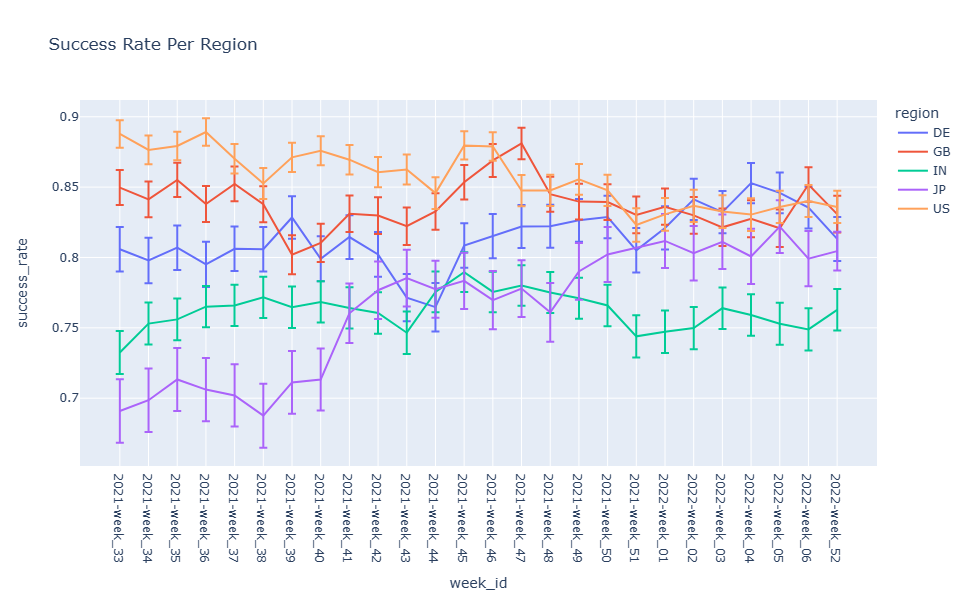

In [91]:
px.line(ad_week_region_success, x = 'week_id', y = 'success_rate', \
        error_y = ad_week_region_success.success_CI_high - ad_week_region_success.success_rate, \
        color = 'region', height = 600 ,title = "Success Rate Per Region")

Produce the following requestser proportion graph:

## Appendix

Code to create weekly files:

In [ ]:
 for l in ad_recs_annotated.region.unique():
    for w in ad_recs_annotated.week_id.unique():
        w_id = w.split('_')[1]
        y = w.split('-')[0]
        query = f'week_id == "{w}" and region == "{l}"'
        sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
        ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']] \
            .to_csv(f'data/weekly/{sample_f_name}', index=False)

        for s in ad_recs_annotated.recommendation_type.unique():
            ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
            query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
            sss = ad_recs_annotated.query(query)
            if sss.empty:
                continue            
            sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']) \
                .to_csv(f'data/weekly/{ann_f_name}', index=False)